In [1]:
# Importing packages and functions
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

path = "./Prosper/"  #Insert path here
database = path + 'Bikes.sqlite'
print(database)

./Prosper/Bikes.sqlite


In [2]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,station,station,2,CREATE TABLE station (\n id INTEGER PRIMARY...
1,table,status,status,3,"CREATE TABLE status (\n station_id INTEGER,..."
2,table,trip,trip,4,CREATE TABLE trip (\n id INTEGER PRIMARY KE...
3,table,weather,weather,5,"CREATE TABLE weather (\n date TEXT,\n ma..."


# All stations Order By Number of Bike Docks Available


In [5]:
station1 = pd.read_sql("""SELECT *
                         FROM station
                         ORDER by dock_count DESC
                         ;""", conn) 

station1

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,61,2nd at Townsend,37.780526,-122.390288,27,San Francisco,8/22/2013
2,67,Market at 10th,37.776619,-122.417385,27,San Francisco,8/23/2013
3,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
4,22,Redwood City Caltrain Station,37.486078,-122.232089,25,Redwood City,8/15/2013
5,28,Mountain View Caltrain Station,37.394358,-122.076713,23,Mountain View,8/15/2013
6,29,San Antonio Caltrain Station,37.406940,-122.106758,23,Mountain View,8/15/2013
7,34,Palo Alto Caltrain Station,37.443988,-122.164759,23,Palo Alto,8/14/2013
8,50,Harry Bridges Plaza (Ferry Building),37.795392,-122.394203,23,San Francisco,8/20/2013
9,55,Temporary Transbay Terminal (Howard at Beale),37.789756,-122.394643,23,San Francisco,8/20/2013


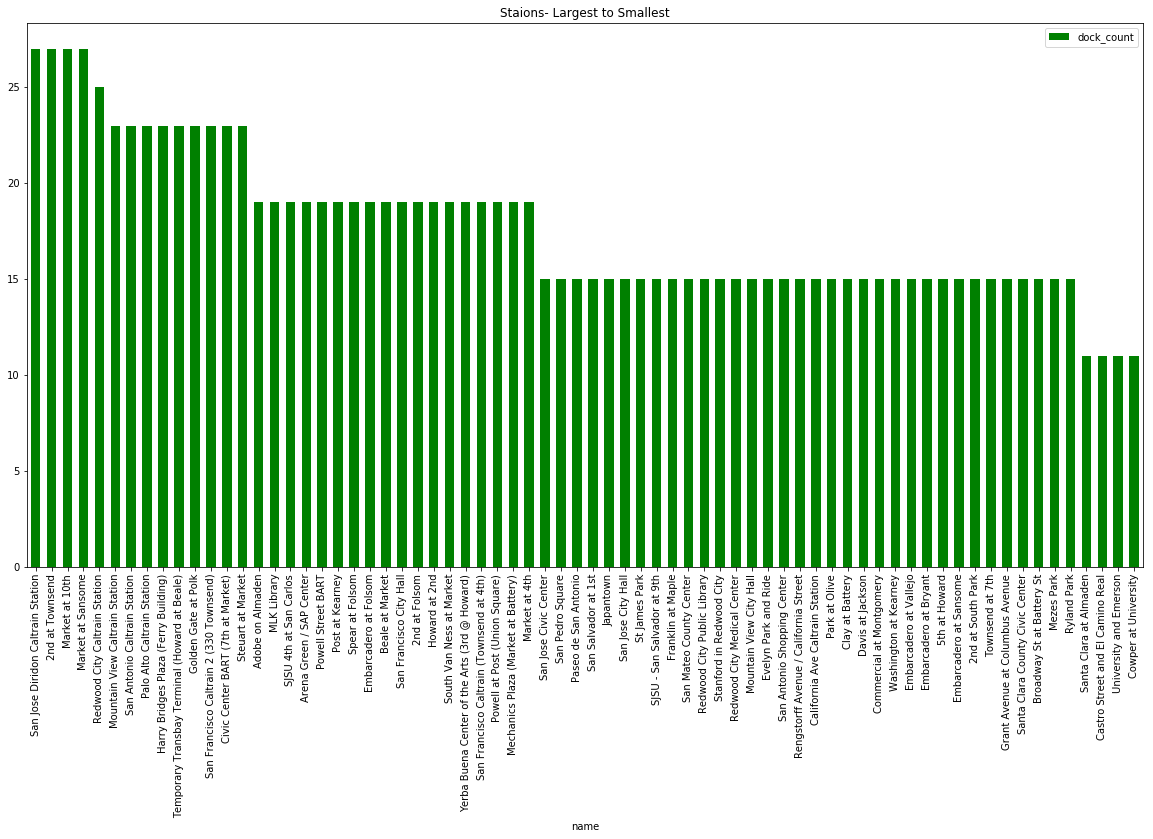

In [148]:
station1.plot.bar('name','dock_count',figsize=(20,10),color = 'green', width = 0.6, title= "Staions- Largest to Smallest")



# Most popular start station , order by number of trips started at station

In [7]:
popularStart = pd.read_sql("""SELECT start_station_name, dock_count, COUNT(*) as count, (AVG(duration)/60) AS AVGLenOfTripInMinutes
                        FROM (SELECT name AS start_station_name, dock_count, duration
                         FROM station
                         JOIN trip on (station.name = trip.start_station_name)
                         ORDER by dock_count DESC)
                        
                        GROUP BY start_station_name
                        ORDER by count DESC 
                        
                        
                      
                       ;""", conn) 

popularStart

,start_station_name,dock_count,count,AVGLenOfTripInMinutes
0,San Francisco Caltrain (Townsend at 4th),19,49092,13.776118
1,San Francisco Caltrain 2 (330 Townsend),23,33742,11.502369
2,Harry Bridges Plaza (Ferry Building),23,32934,24.916570
3,Embarcadero at Sansome,15,27713,23.522255
4,Temporary Transbay Terminal (Howard at Beale),23,26089,10.923919
5,2nd at Townsend,27,25837,13.194416
6,Steuart at Market,23,24838,15.595143
7,Market at Sansome,27,24172,15.386587
8,Townsend at 7th,15,23724,11.275374
9,Market at 10th,27,20272,17.486911


# Some Take Aways

Plotting the information in from this SQL query we can see several intersting things in the resulting box plots. 
The first boxplot shows that as the stations get larger the median number of trips taken at the station gets larger. We also see the
the variation in number of trips taken at each station grows as the type of station gets larger.

We see the opposite affect in terms of the average lenght of trip taken. As generally as station get larger they produce a smaller median
average trip time, and have less variation between the station that share their size in terms of the average lengths of trip.

In general terms we see that larger station produce more trips but shorter travel times. While smaller station have less trips annualy but experienced travelers going on longer trips.

We see these same patterns when looking at the end stations of trip, as plotted below.

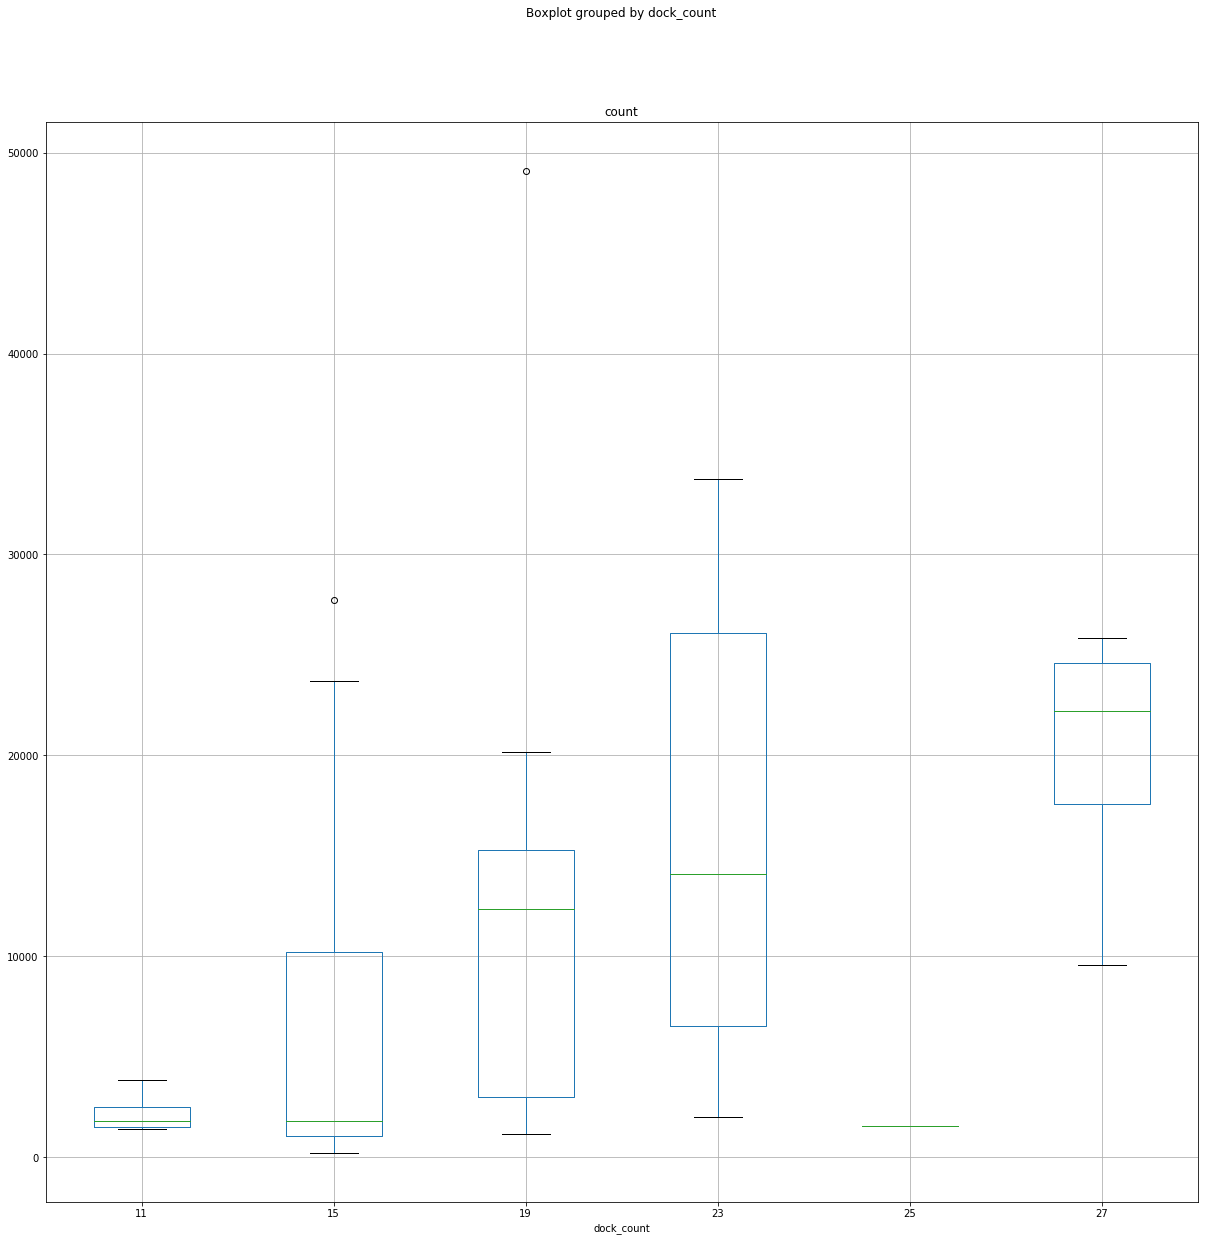

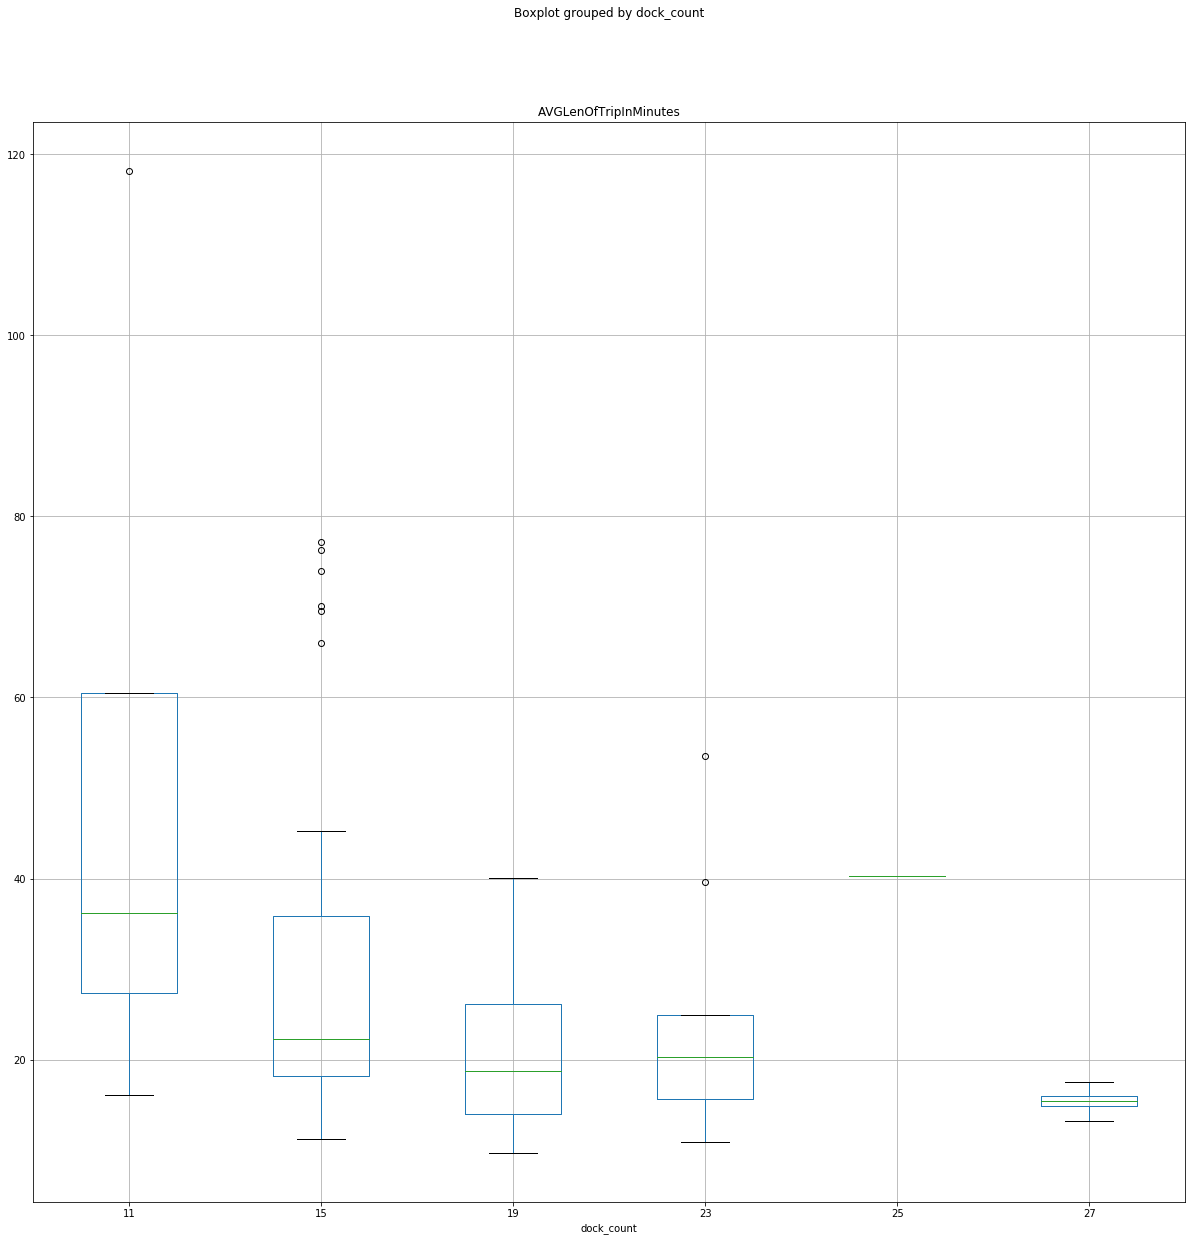

In [8]:
popularStart.boxplot(column =["count"], by ="dock_count", figsize =(20,20))
popularStart.boxplot(column =["AVGLenOfTripInMinutes"], by ="dock_count", figsize =(20,20))


# Most popular end station , order by number of trips finished at station

In [9]:
popularEnd = pd.read_sql("""SELECT end_station_name,dock_count, COUNT(*) as count, (AVG(duration)/60) AS AvgLenOfTripInMins
                        FROM (SELECT name AS end_station_name, dock_count, duration
                         FROM station
                         JOIN trip on (station.name = trip.end_station_name)
                         ORDER by dock_count DESC)
                        
                        GROUP BY end_station_name
                        ORDER by count DESC 
                        
                        
                      
                       ;""", conn) 
popularEnd

,end_station_name,dock_count,count,AvgLenOfTripInMins
0,San Francisco Caltrain (Townsend at 4th),19,63179,12.721510
1,San Francisco Caltrain 2 (330 Townsend),23,35117,11.445975
2,Harry Bridges Plaza (Ferry Building),23,33193,19.544540
3,Embarcadero at Sansome,15,30796,29.003168
4,2nd at Townsend,27,28529,12.758135
5,Market at Sansome,27,28033,14.239896
6,Townsend at 7th,15,26637,11.915675
7,Steuart at Market,23,25025,14.789037
8,Temporary Transbay Terminal (Howard at Beale),23,23080,10.809351
9,Market at 4th,19,19915,21.566577


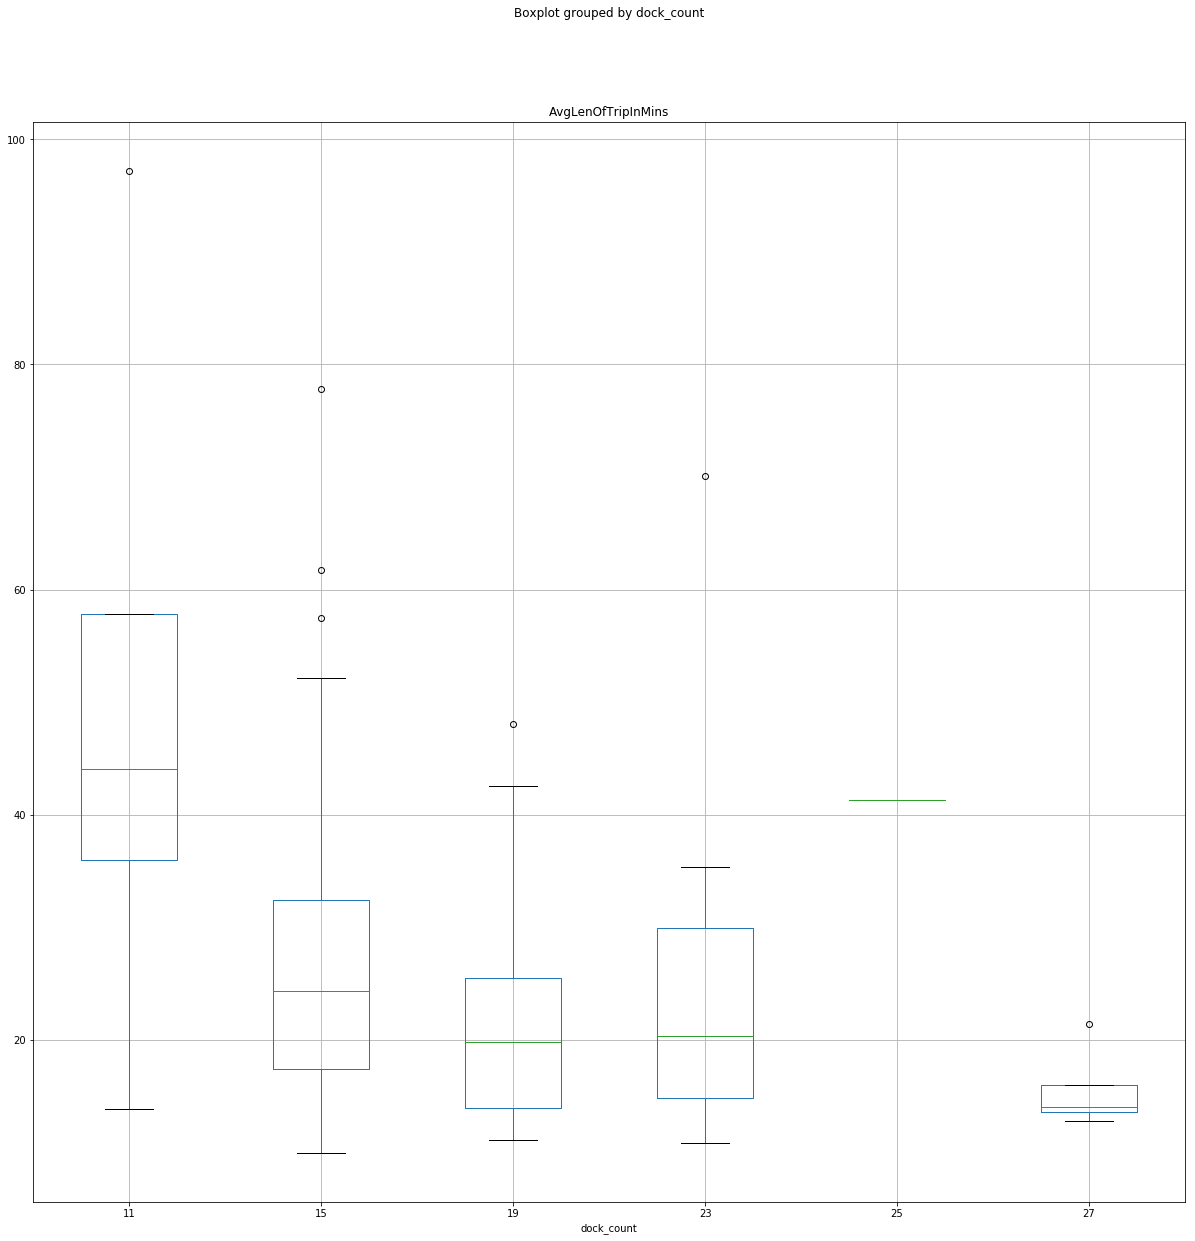

In [10]:
popularEnd.boxplot(column =["AvgLenOfTripInMins"], by ="dock_count", figsize =(20,20))

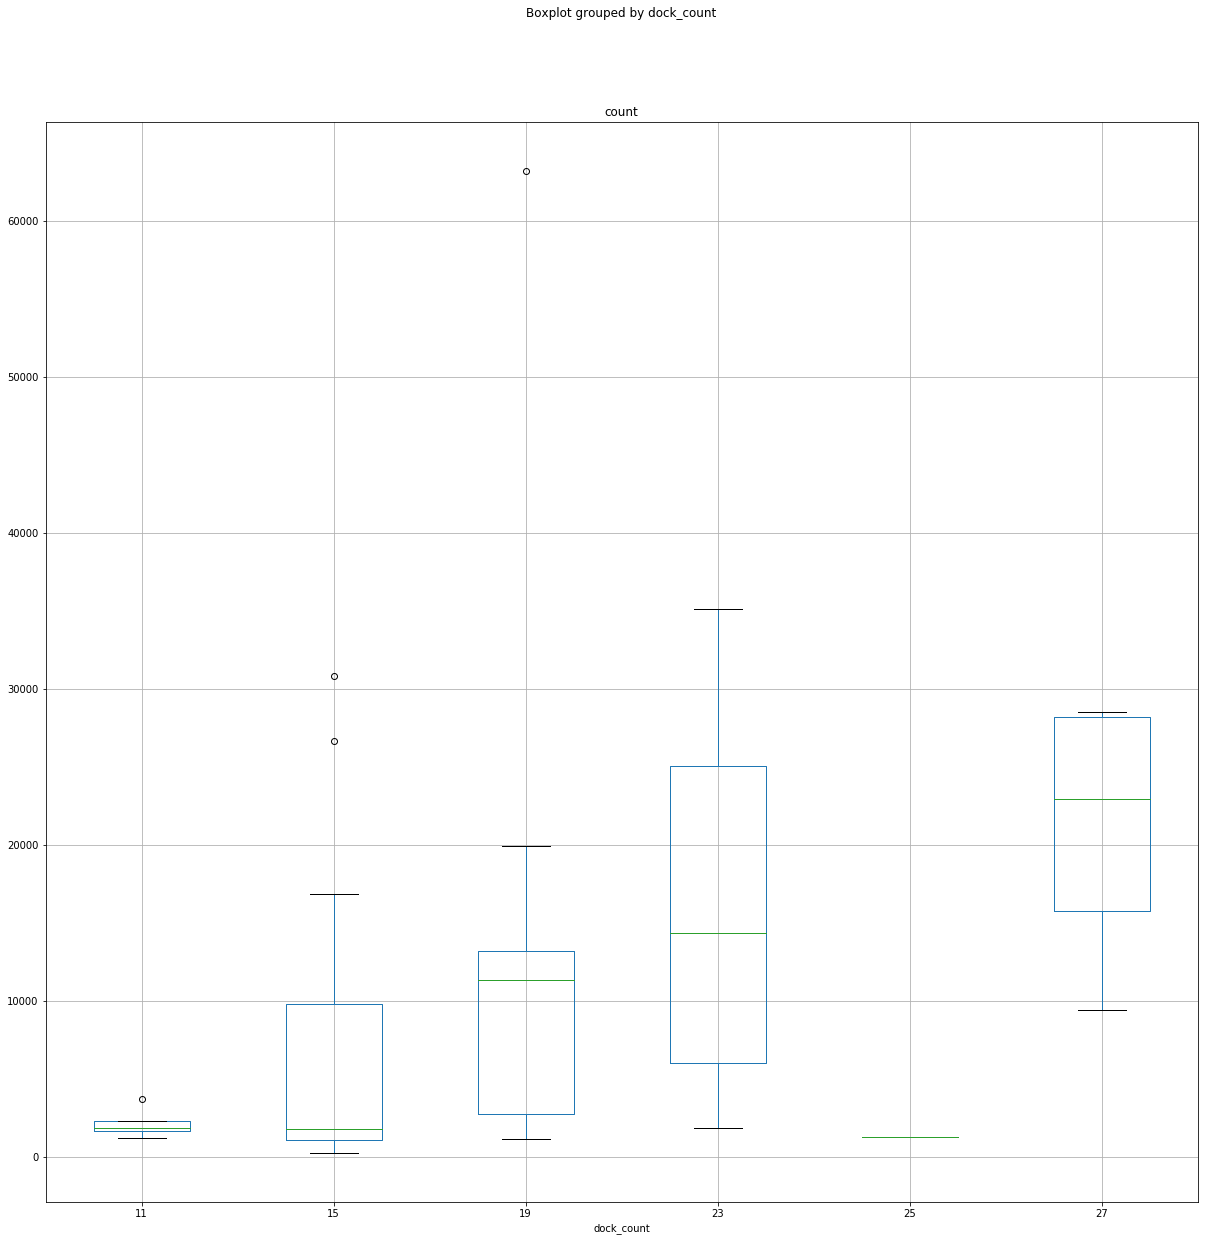

In [192]:
popularEnd.boxplot(column =["count"], by ="dock_count", figsize =(20,20))

# 50 MOST POPULAR ROUTES 

In [131]:
trip = pd.read_sql("""

SELECT
  start_station_name|| ' to ' ||end_station_name AS tripRoute,
  AVG(duration)/60 as avgDuration,
  count(*) as count,
  start_station_name,
  end_station_name,
  A.dock_count AS start_dock_count,
  B.dock_count AS end_dock_count
  
FROM trip
JOIN station A on trip.start_station_name = A.name
JOIN station B on trip.end_station_name = B.name


group by start_station_name, end_station_name
ORDER by COUNT desc
LIMIT 100
;""", conn) 

trip

,tripRoute,avgDuration,count,start_station_name,end_station_name,start_dock_count,end_dock_count
0,San Francisco Caltrain 2 (330 Townsend) to Tow...,5.288361,6216,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,23,15
1,Harry Bridges Plaza (Ferry Building) to Embarc...,21.073126,6164,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,23,15
2,Townsend at 7th to San Francisco Caltrain (Tow...,4.753290,5041,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),15,19
3,2nd at Townsend to Harry Bridges Plaza (Ferry ...,9.718031,4839,2nd at Townsend,Harry Bridges Plaza (Ferry Building),27,23
4,Harry Bridges Plaza (Ferry Building) to 2nd at...,11.144209,4357,Harry Bridges Plaza (Ferry Building),2nd at Townsend,23,27
5,Embarcadero at Sansome to Steuart at Market,9.042250,4269,Embarcadero at Sansome,Steuart at Market,15,23
6,Embarcadero at Folsom to San Francisco Caltrai...,11.949782,3967,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),19,19
7,Steuart at Market to 2nd at Townsend,9.612734,3903,Steuart at Market,2nd at Townsend,23,27
8,2nd at South Park to Market at Sansome,9.007679,3627,2nd at South Park,Market at Sansome,15,27
9,San Francisco Caltrain (Townsend at 4th) to Ha...,13.971185,3622,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),19,23


In [133]:
trip1 = pd.read_sql("""

SELECT
  start_station_name|| ' to ' ||end_station_name AS tripRoute,
  AVG(duration)/60 as avgDuration,
  count(*) as count,
  start_station_name,
  end_station_name,
  A.dock_count AS start_dock_count,
  B.dock_count AS end_dock_count
  
FROM trip
JOIN station A on trip.start_station_name = A.name
JOIN station B on trip.end_station_name = B.name


GROUP BY start_station_name, end_station_name
HAVING subscription_type ="Subscriber" 
ORDER by COUNT desc
LIMIT 100
;""", conn) 

trip1

,tripRoute,avgDuration,count,start_station_name,end_station_name,start_dock_count,end_dock_count
0,San Francisco Caltrain 2 (330 Townsend) to Tow...,5.288361,6216,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,23,15
1,Harry Bridges Plaza (Ferry Building) to Embarc...,21.073126,6164,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,23,15
2,Townsend at 7th to San Francisco Caltrain (Tow...,4.753290,5041,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),15,19
3,2nd at Townsend to Harry Bridges Plaza (Ferry ...,9.718031,4839,2nd at Townsend,Harry Bridges Plaza (Ferry Building),27,23
4,Harry Bridges Plaza (Ferry Building) to 2nd at...,11.144209,4357,Harry Bridges Plaza (Ferry Building),2nd at Townsend,23,27
5,Embarcadero at Sansome to Steuart at Market,9.042250,4269,Embarcadero at Sansome,Steuart at Market,15,23
6,Embarcadero at Folsom to San Francisco Caltrai...,11.949782,3967,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),19,19
7,Steuart at Market to 2nd at Townsend,9.612734,3903,Steuart at Market,2nd at Townsend,23,27
8,2nd at South Park to Market at Sansome,9.007679,3627,2nd at South Park,Market at Sansome,15,27
9,San Francisco Caltrain (Townsend at 4th) to Ha...,13.971185,3622,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),19,23


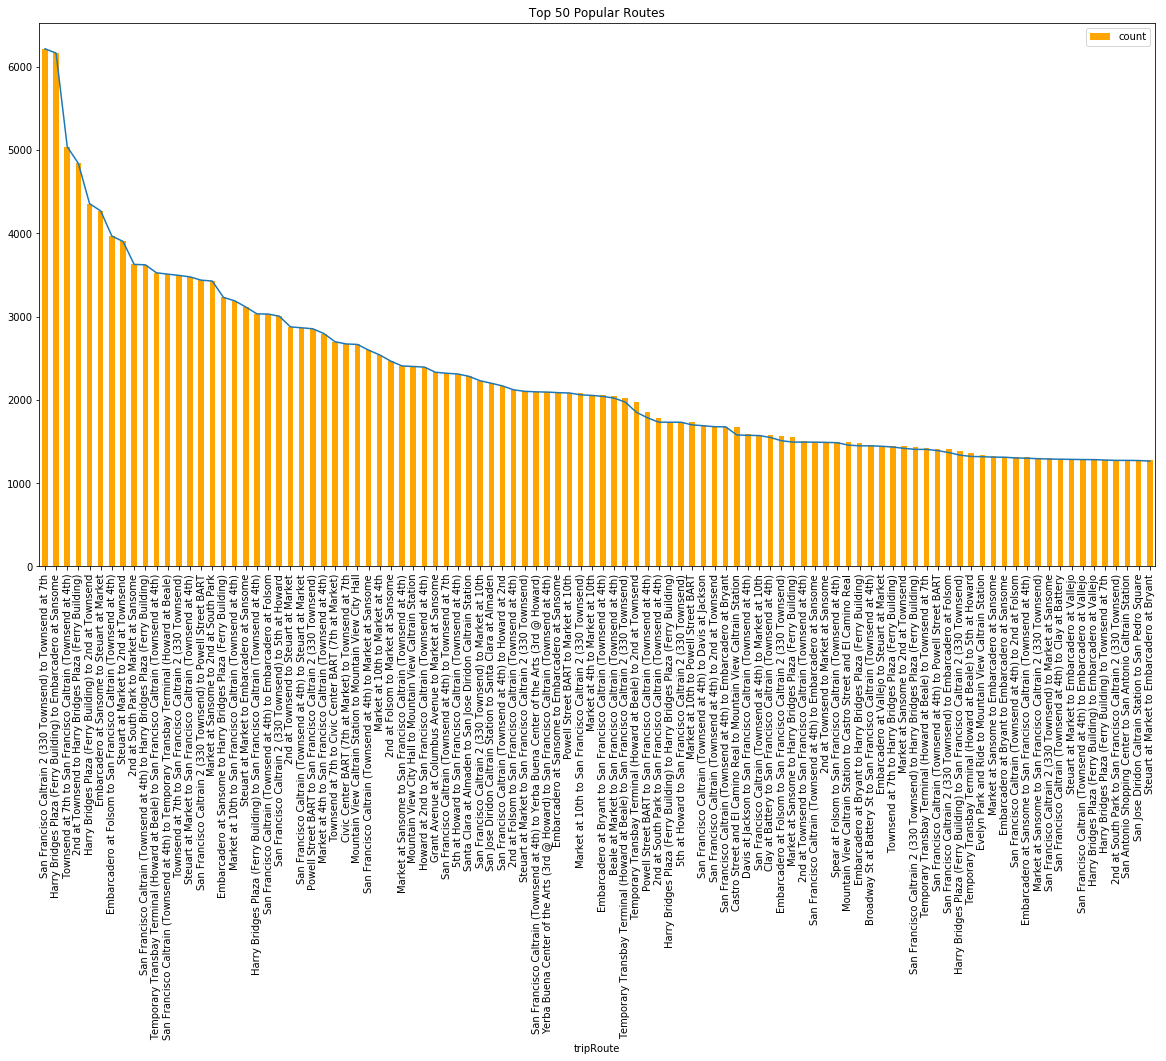

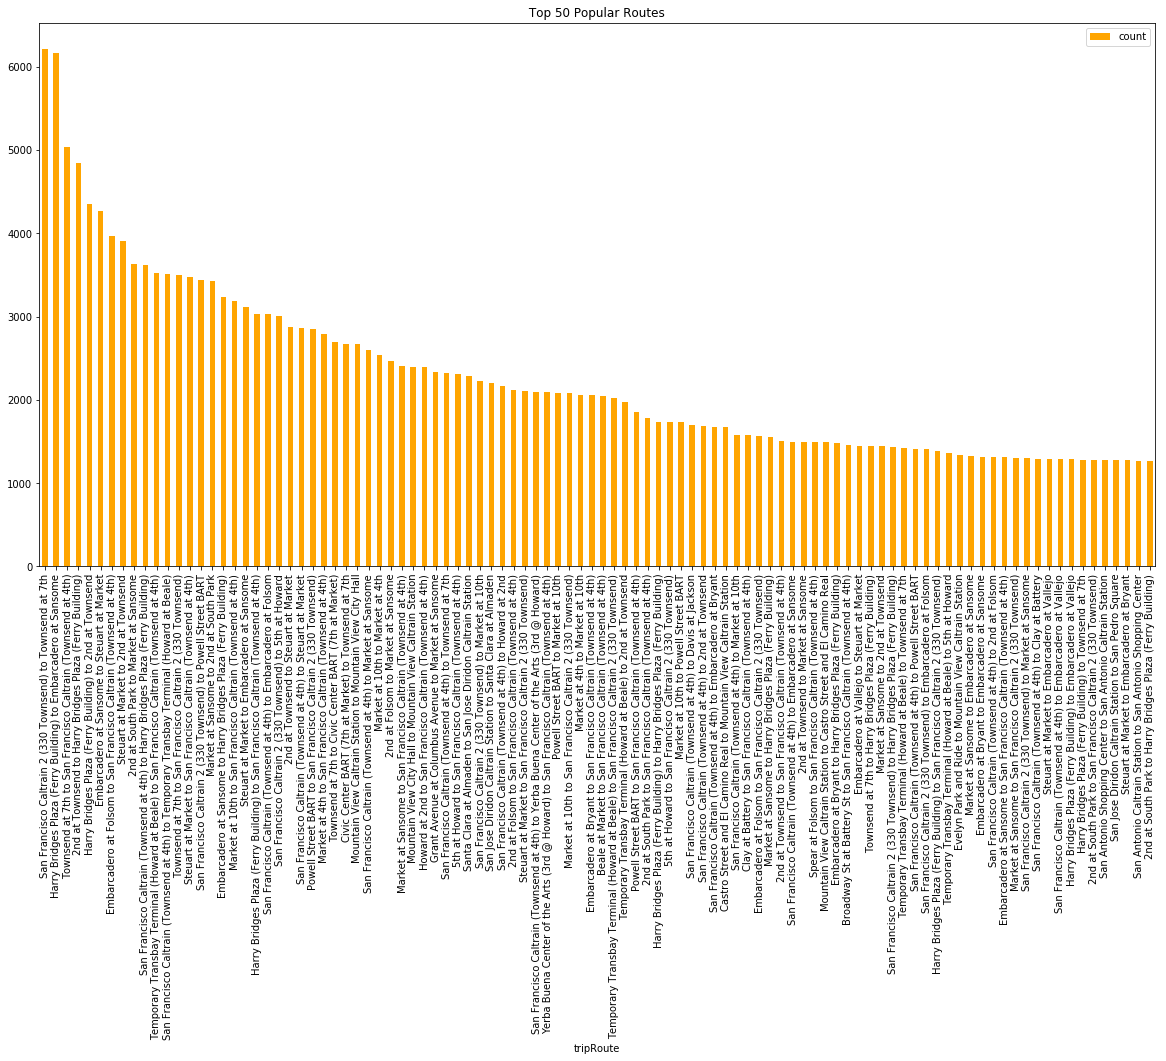

In [144]:
trip.plot.bar("tripRoute","count", figsize= (20,10), color = "orange", title = " Top 50 Popular Routes ").plot(trip1["count"])


# Most popular routes subscribers vs customers

# Longest  trips

In [141]:
trip2 = pd.read_sql("""SELECT duration/60, start_station_name , end_station_name, bike_id , subscription_type
                         FROM trip
                         ORDER BY duration DESC;""", conn) 

subscribers = pd.read_sql("""SELECT duration/60, start_station_name , end_station_name, bike_id , subscription_type
                         FROM trip
                         WHERE subscription_type = "Subscriber"
                         ORDER BY duration DESC;""", conn) 

trip2

,duration/60,start_station_name,end_station_name,bike_id,subscription_type
0,287840,South Van Ness at Market,2nd at Folsom,535,Customer
1,35616,Market at Sansome,Yerba Buena Center of the Arts (3rd @ Howard),466,Customer
2,30876,San Antonio Shopping Center,Castro Street and El Camino Real,680,Subscriber
3,18892,University and Emerson,University and Emerson,262,Customer
4,12037,University and Emerson,University and Emerson,247,Customer
5,12007,Redwood City Caltrain Station,Stanford in Redwood City,692,Customer
6,11941,Harry Bridges Plaza (Ferry Building),Civic Center BART (7th at Market),633,Subscriber
7,11922,Arena Green / SAP Center,Adobe on Almaden,251,Customer
8,11481,Palo Alto Caltrain Station,California Ave Caltrain Station,230,Customer
9,10932,San Jose Civic Center,SJSU 4th at San Carlos,132,Customer


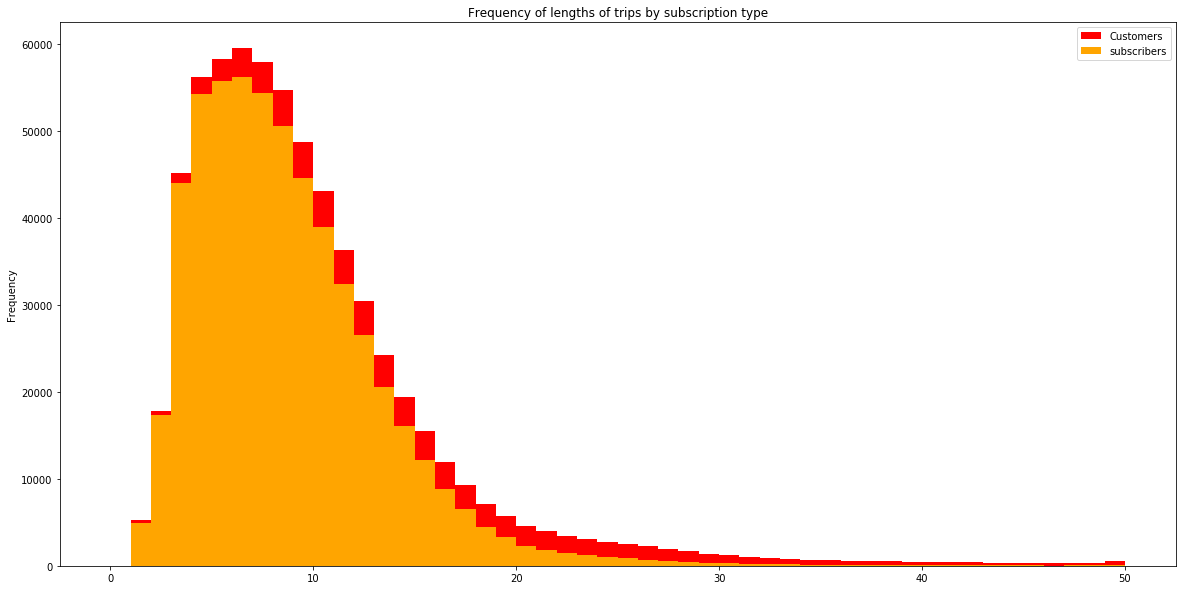

In [160]:
(trip2["duration/60"].rename("Customers")).plot.hist(range = (0,50), bins = 50, figsize = (20,10), color ='red', legend = True, title= "Frequency of lengths of trips by subscription type")
(subscribers["duration/60"].rename("subscribers")).plot.hist(range = (0,50), bins = 50, figsize = (20,10), color = "orange", legend = True)
